<a href="https://colab.research.google.com/github/luasampaio/data-engineering/blob/main/3_ntb_passageiros.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%pip install -q watermark

In [2]:
# Carrega o pacote watermark como um comando mágico no Jupyter Notebook.
%load_ext watermark

In [3]:
# Versão do Python e de todos os pacotes importados neste projeto.
%watermark -a "Luciana Sampaio" -gu "luasampaio" --python --iversions --watermark

Author: Luciana Sampaio

Github username: luasampaio

Python implementation: CPython
Python version       : 3.10.12
IPython version      : 7.34.0

Watermark: 2.5.0



In [4]:
import pandas as pd
import seaborn as srn
import statistics as sts

In [5]:
import pandas as pd
df = pd.read_csv('/content/train.csv')

In [6]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
df.groupby('Age')

In [8]:
df.groupby('Sex').head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [9]:
# Quantidade de linhas e colunas do conjunto de dados.
rows, columns = df.shape
print(f"Linhas: {rows}\nColunas: {columns}")

Linhas: 891
Colunas: 12


In [10]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [11]:
print("Total registros:",df.count())

Total registros: PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64


In [12]:
display(df)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [13]:
## Saber Nome das colunas e o tipo
print('Columns overview')
dtypes_df = pd.DataFrame({'Column Name': df.dtypes.index, 'Data type': df.dtypes.values})
print(dtypes_df)

Columns overview
    Column Name Data type
0   PassengerId     int64
1      Survived     int64
2        Pclass     int64
3          Name    object
4           Sex    object
5           Age   float64
6         SibSp     int64
7         Parch     int64
8        Ticket    object
9          Fare   float64
10        Cabin    object
11     Embarked    object


In [14]:
#Convetendo idade par int

df['Age'] = df['Age'].fillna(0).astype(int)



In [15]:
df.dtypes

,0
PassengerId,int64
Survived,int64
Pclass,int64
Name,object
Sex,object
Age,int64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64


In [16]:
male = df.query('Sex == "male"')
male

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,0,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
883,884,0,2,"Banfield, Mr. Frederick James",male,28,0,0,C.A./SOTON 34068,10.5000,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25,0,0,SOTON/OQ 392076,7.0500,NaN,S
886,887,0,2,"Montvila, Rev. Juozas",male,27,0,0,211536,13.0000,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26,0,0,111369,30.0000,C148,C


In [17]:
Total = male.groupby('Sex').count()

In [18]:
Total

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Sex,,,,,,,,,,,
male,577,577,577,577,577,577,577,577,577,107,577


Ordernação com Pandas

In [19]:
df = df.sort_values(by='Name', ascending=True)
df = df.sort_values(by='Age', ascending=False)


In [20]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80,0,0,27042,30.0000,A23,S
851,852,0,3,"Svensson, Mr. Johan",male,74,0,0,347060,7.7750,NaN,S
96,97,0,1,"Goldschmidt, Mr. George B",male,71,0,0,PC 17754,34.6542,A5,C
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71,0,0,PC 17609,49.5042,NaN,C
116,117,0,3,"Connors, Mr. Patrick",male,70,0,0,370369,7.7500,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
367,368,1,3,"Moussa, Mrs. (Mantoura Boulos)",female,0,0,0,2626,7.2292,NaN,C
709,710,1,3,"Moubarek, Master. Halim Gonios (""William George"")",male,0,1,1,2661,15.2458,NaN,C
65,66,1,3,"Moubarek, Master. Gerios",male,0,1,1,2661,15.2458,NaN,C
107,108,1,3,"Moss, Mr. Albert Johan",male,0,0,0,312991,7.7750,NaN,S


In [21]:
sex_counts = df.groupby('Sex').size().reset_index(name='count')
print(sex_counts)


      Sex  count
0  female    314
1    male    577


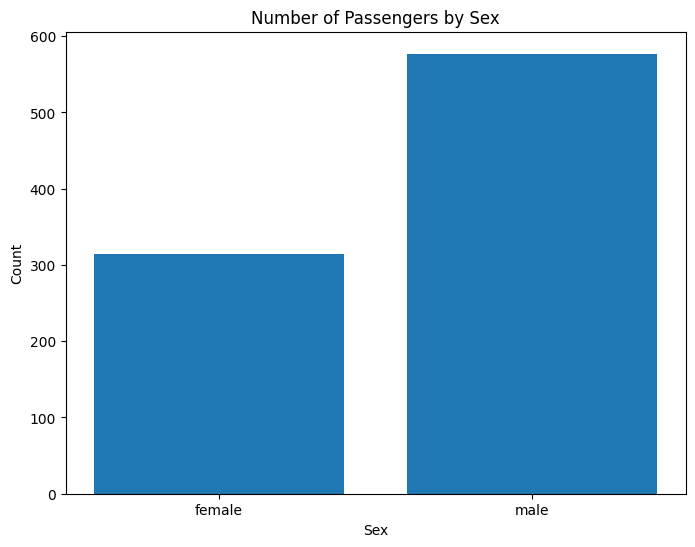

In [22]:
# prompt: categoria sex_counts

import pandas as pd
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df' and already loaded

# Group by 'Sex' and count occurrences
sex_counts = df.groupby('Sex').size().reset_index(name='count')

# Create a bar plot
plt.figure(figsize=(8, 6))  # Adjust figure size if needed
plt.bar(sex_counts['Sex'], sex_counts['count'])
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Number of Passengers by Sex')
plt.show()



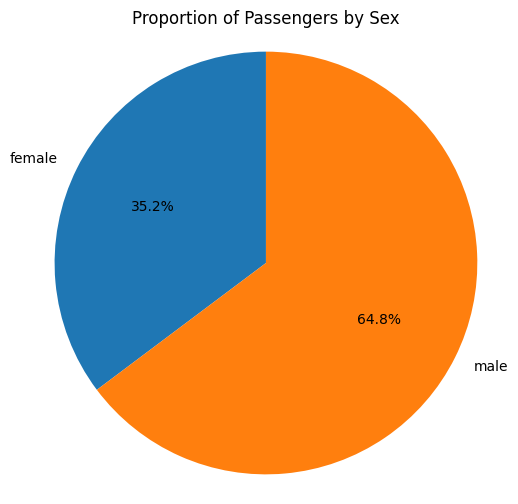

In [23]:
# Create a pie chart
plt.figure(figsize=(6, 6))  # Adjust figure size if needed
plt.pie(sex_counts['count'], labels=sex_counts['Sex'], autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.title('Proportion of Passengers by Sex')
plt.show()